**Общая информация**

**Срок сдачи:** 20 марта 2019, 06:00 <br\>
**Штраф за опоздание:** -1 балл после 06:00 20 марта, -2 балла после 06:00 27 марта, -3 балла после 06:00 3 апреля

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack скинуть ссылку в личный чат @alkhamush
Пример ссылки:
https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb 


Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.datasets import fetch_openml #!!!
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%load_ext pycodestyle_magic

In [3]:
%%pycodestyle

from scipy.spatial import distance
from sklearn.neighbors import KDTree
from sklearn.metrics import accuracy_score


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):

    def __init__(self, n_neighbors=5, algorithm='brute'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
        pass

    def fit(self, X, y):
        self.data_train = np.array(X)
        self.train_ans = np.array(y)
        self.classes = np.unique(y)
        self.n_classes = self.classes.shape[0]
        if(self.algorithm == 'kd_tree'):
            self.tree = KDTree(X)
        pass

    def predict(self, X):
        if(self.algorithm == 'kd_tree'):
            dist, neighbors = self.tree.query(X, k=self.n_neighbors)
        else:
            dist = distance.cdist(X, self.data_train, 'minkowski')
            neighbors = np.argpartition(dist, self.n_neighbors, axis=1)
        neighbor_class = self.train_ans[neighbors[:, :self.n_neighbors:]]
        classes, counts = scipy.stats.mode(neighbor_class, axis=1)
        return classes.T
        pass

    def predict_proba(self, X):
        if(self.algorithm == 'kd_tree'):
            dist, neighbors = self.tree.query(X, k=self.n_neighbors)
        else:
            dist = distance.cdist(X, self.data_train, 'minkowski')
            neighbors = np.argpartition(dist, self.n_neighbors, axis=1)
        dtype_ = self.classes.dtype
        mask = np.empty(shape=(X.shape[0], self.n_classes), dtype=dtype_)
        mask[:] = self.classes
        neighbor_class = self.train_ans[neighbors[:, :self.n_neighbors:]]
        neighbors = np.concatenate([neighbor_class, mask], axis=1)
        neighbors = neighbors.astype(int, casting="unsafe")
        freq = np.apply_along_axis(np.bincount, 1, neighbors)
        prob = (freq - 1) / self.n_neighbors
        return prob
        pass

    def score(self, X, y):
        y = y.astype(int, casting="unsafe")
        X = self.predict(X).astype(int, casting="unsafe")
        return y[np.where(y == X)[0]].shape[0] / y.shape[0]
        pass

58:1: W391 blank line at end of file


**IRIS**

In [4]:
iris = datasets.load_iris()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [6]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [7]:
%time clf.fit(X_train, y_train)

Wall time: 2 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [8]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [9]:
%time clf.predict(X_test)

Wall time: 2 ms


array([1, 2, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 1, 0])

In [10]:
%time my_clf.predict(X_test)

Wall time: 995 µs


array([[1, 2, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 1, 0]])

In [11]:
%time clf.predict_proba(X_test)

Wall time: 2 ms


array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [12]:
%time my_clf.predict_proba(X_test)

Wall time: 999 µs


array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [13]:
clf.score(X_test, y_test)

0.9333333333333333

In [14]:
my_clf.score(X_test, y_test)

0.9333333333333333

Задание 3

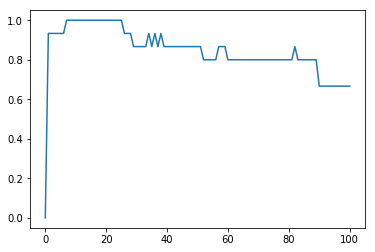

In [15]:
iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)
my_clf = MyKNeighborsClassifier(n_neighbors=1)
target_size = 101
y = np.zeros(shape=target_size)
for i in range(target_size - 1):
    my_clf.n_neighbors = i + 1
    my_clf.fit(X_train, y_train)
    my_clf.predict(X_test)
    y[i+1] = my_clf.score(X_test, y_test)
plt.plot(range(target_size), y)

**MNIST**

In [16]:
mnist = fetch_openml('mnist_784')

In [17]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [18]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [19]:
%time clf.fit(X_train, y_train)

Wall time: 1min 55s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [20]:
%time my_clf.fit(X_train, y_train)

Wall time: 1.17 s


In [21]:
%time clf.predict(X_test)

Wall time: 4min 6s


array(['1', '1', '8', '0', '7', '7', '6', '1', '7', '4', '3', '5', '7',
       '7', '5', '2', '1', '8', '9', '5', '8', '3', '7', '4', '7', '4',
       '1', '9', '6', '3', '3', '3', '0', '0', '5', '1', '2', '7', '4',
       '1', '9', '8', '6', '0', '8', '4', '6', '6', '8', '6', '9', '1',
       '8', '3', '7', '6', '6', '0', '7', '6', '0', '8', '8', '9', '0',
       '0', '2', '9', '3', '5', '8', '2', '5', '4', '6', '0', '7', '9',
       '6', '9', '3', '7', '9', '4', '6', '1', '0', '0', '3', '6', '1',
       '5', '0', '3', '6', '2', '9', '9', '3', '2', '4', '8', '2', '1',
       '5', '5', '1', '5', '5', '6', '6', '3', '2', '0', '9', '7', '7',
       '2', '0', '4', '1', '0', '7', '3', '7', '2', '4', '4', '2', '1',
       '0', '8', '6', '6', '5', '2', '5', '4', '6', '8', '1', '6', '4',
       '6', '2', '8', '9', '0', '8', '0', '3', '2', '6', '2', '7', '3',
       '1', '5', '4', '2', '3', '4', '9', '8', '1', '0', '7', '7', '6',
       '9', '4', '0', '5', '2', '4', '3', '8', '3', '7', '7', '0

In [22]:
%time my_clf.predict(X_test)

C:\Users\nikol\Anaconda\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


Wall time: 40min


array([['1', '1', '8', '0', '7', '7', '6', '1', '7', '4', '3', '5', '7',
        '7', '5', '2', '1', '8', '9', '5', '8', '3', '7', '4', '7', '4',
        '1', '9', '6', '3', '3', '3', '0', '0', '5', '1', '2', '7', '4',
        '1', '9', '8', '6', '0', '8', '4', '6', '6', '8', '6', '9', '1',
        '8', '3', '7', '6', '6', '0', '7', '6', '0', '8', '8', '9', '0',
        '0', '2', '9', '3', '5', '8', '2', '5', '4', '6', '0', '7', '9',
        '6', '9', '3', '7', '9', '4', '6', '1', '0', '0', '3', '6', '1',
        '5', '0', '3', '6', '2', '9', '9', '3', '2', '4', '8', '2', '1',
        '5', '5', '1', '5', '5', '6', '6', '3', '2', '0', '9', '7', '7',
        '2', '0', '4', '1', '0', '7', '3', '7', '2', '4', '4', '2', '1',
        '0', '8', '6', '6', '5', '2', '5', '4', '6', '8', '1', '6', '4',
        '6', '2', '8', '9', '0', '8', '0', '3', '2', '6', '2', '7', '3',
        '1', '5', '4', '2', '3', '4', '9', '8', '1', '0', '7', '7', '6',
        '9', '4', '0', '5', '2', '4', '3', '8', '3'

In [23]:
%time clf.predict_proba(X_test)

Wall time: 3min 49s


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
%time my_clf.predict_proba(X_test)

Wall time: 33min 49s


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
clf.score(X_test, y_test)

0.9771428571428571

In [26]:
my_clf.score(X_test, y_test)

C:\Users\nikol\Anaconda\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


0.9771428571428571

Задание 4

In [27]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [28]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [29]:
%time clf.fit(X_train, y_train)

Wall time: 2min 1s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [30]:
%time my_clf.fit(X_train, y_train)

Wall time: 2min 32s


In [31]:
%time clf.predict(X_test)

Wall time: 3min 49s


array(['8', '8', '5', '1', '2', '4', '1', '9', '2', '6', '9', '6', '5',
       '3', '5', '9', '0', '0', '6', '7', '7', '5', '0', '4', '1', '1',
       '4', '3', '9', '0', '3', '4', '6', '3', '2', '2', '7', '3', '1',
       '5', '3', '0', '1', '5', '4', '9', '0', '4', '2', '8', '6', '2',
       '5', '1', '2', '6', '2', '8', '3', '0', '1', '1', '2', '5', '9',
       '3', '0', '3', '5', '0', '8', '7', '6', '9', '1', '0', '6', '9',
       '5', '2', '9', '0', '0', '1', '1', '0', '2', '7', '3', '3', '6',
       '4', '6', '5', '2', '8', '7', '0', '9', '8', '8', '3', '5', '4',
       '6', '0', '1', '8', '6', '9', '9', '7', '0', '0', '6', '0', '5',
       '7', '2', '8', '1', '7', '3', '2', '9', '4', '2', '9', '4', '4',
       '5', '4', '3', '3', '0', '1', '3', '7', '3', '5', '8', '5', '4',
       '0', '3', '7', '5', '5', '2', '1', '4', '3', '6', '4', '0', '6',
       '8', '7', '2', '6', '6', '6', '9', '1', '6', '3', '7', '2', '9',
       '1', '7', '1', '2', '6', '5', '1', '6', '1', '0', '1', '0

In [32]:
%time my_clf.predict(X_test)

Wall time: 2min 48s


C:\Users\nikol\Anaconda\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


array([['8', '8', '5', '1', '2', '4', '1', '9', '2', '6', '9', '6', '5',
        '3', '5', '9', '0', '0', '6', '7', '7', '5', '0', '4', '1', '1',
        '4', '3', '9', '0', '3', '4', '6', '3', '2', '2', '7', '3', '1',
        '5', '3', '0', '1', '5', '4', '9', '0', '4', '2', '8', '6', '2',
        '5', '1', '2', '6', '2', '8', '3', '0', '1', '1', '2', '5', '9',
        '3', '0', '3', '5', '0', '8', '7', '6', '9', '1', '0', '6', '9',
        '5', '2', '9', '0', '0', '1', '1', '0', '2', '7', '3', '3', '6',
        '4', '6', '5', '2', '8', '7', '0', '9', '8', '8', '3', '5', '4',
        '6', '0', '1', '8', '6', '9', '9', '7', '0', '0', '6', '0', '5',
        '7', '2', '8', '1', '7', '3', '2', '9', '4', '2', '9', '4', '4',
        '5', '4', '3', '3', '0', '1', '3', '7', '3', '5', '8', '5', '4',
        '0', '3', '7', '5', '5', '2', '1', '4', '3', '6', '4', '0', '6',
        '8', '7', '2', '6', '6', '6', '9', '1', '6', '3', '7', '2', '9',
        '1', '7', '1', '2', '6', '5', '1', '6', '1'

In [33]:
%time clf.predict_proba(X_test)

Wall time: 3min 30s


array([[0. , 0. , 0. , ..., 0. , 1. , 0. ],
       [0. , 0. , 0. , ..., 0. , 1. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0.5],
       [0. , 0. , 0. , ..., 0. , 0. , 1. ],
       [0. , 0. , 0. , ..., 0. , 1. , 0. ]])

In [34]:
%time my_clf.predict_proba(X_test)

Wall time: 2min 55s


array([[0. , 0. , 0. , ..., 0. , 1. , 0. ],
       [0. , 0. , 0. , ..., 0. , 1. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0.5],
       [0. , 0. , 0. , ..., 0. , 0. , 1. ],
       [0. , 0. , 0. , ..., 0. , 1. , 0. ]])

In [35]:
clf.score(X_test, y_test)

0.9742857142857143

In [36]:
my_clf.score(X_test, y_test)

C:\Users\nikol\Anaconda\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


0.9742857142857143

Задание 5

In [ ]:
# seaborn
# Библиотека для визуализации данных основанная на mathplotlib
# matplotlib
# библиотека для построения графиков и визуализации данных
# train_test_split
# разделяет данные на тестовую и трениировочную выборку для проверки качества модели
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline)
# Класс для работы и преобразования текстовых данных 
# StandardScaler (from sklearn.preprocessing import StandardScaler)
# Класс для подготовки данных, должен нормализовать/стандартизировать данные(mean = 0 и standard deviation = 1)
# ClassifierMixin
# Смешанный(родительский) класс для всех классификаторов sklern иницилизирует себя и может посчитать score
# NeighborsBase
# Смешанный(родительский) класс для всех классификаторов типа к ближайших соседей sklern
# KNeighborsMixin
# Смешанный(родительский) класс для всех классификаторов типа к ближайших соседей sklern имеет метод knn
# SupervisedIntegerMixin
# Смешанный(родительский) класс для всех классификаторов sklern имеет метод fit